In [50]:
# (V_d,h_dot,I) for a single dot

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import potential_profile
reload(potential_profile)
import tunneling
reload(tunneling)
import rank_nullspace
reload(rank_nullspace)

import time

st = time.time()
N_v_points = 100
V_d_vec = np.linspace(200e-3,170e-3,N_v_points)

N_grid= 100
x = np.linspace(-1,1,N_grid)
K = thomas_fermi.create_K_matrix(x,E_scale=1e-3,sigma= (x[1] - x[0]),x_0= (x[1] - x[0]))

battery_ind = []
max_prob_node = []

h_points = 25
h_vec = np.linspace(0.9,1.1,h_points)

I_vec = np.zeros((h_points,N_v_points))
charge_state = np.zeros((h_points,N_v_points))

for i in range(h_points):
    print i
    for j in range(N_v_points):
        d = (V_d_vec[j],0,0.1,1)
        b1 = (-200e-3,0.4,0.1,1)
        b2 = (-200e-3*h_vec[i],-0.4,0.1,1)

        V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)                       
        mu_l = (0.05,0.05+0.001)
    
        graph_model = (25,1)
        battery_weight = 10000
        kT = 400e-6
        physics = (x,V,K,mu_l,battery_weight,kT)

        if(j==0):
            G = markov_graph.generate_graph(graph_model, physics)
            battery_ind = markov_graph.get_battery_nodes(G)
            max_prob_node_trial  = markov_graph.get_max_prob_node(G)[0][1]
            graph_model = (max_prob_node_trial,1)
            print graph_model
            G = markov_graph.generate_graph(graph_model, physics)
            battery_ind = markov_graph.get_battery_nodes(G)
        else:
            G = markov_graph.recalculate_weights(G,physics)  
   
        I_vec[i,j] = markov_graph.get_current(G,battery_ind)
        charge_state[i,j] = markov_graph.get_max_prob_node(G)[0][1]


0
(11, 1)
1
(11, 1)
2
(10, 1)
3
(10, 1)
4
(10, 1)
5
(9, 1)
6
(9, 1)
7
(9, 1)
8
(9, 1)
9
(9, 1)
10
(9, 1)
11
(8, 1)
12
(8, 1)
13
(8, 1)
14
(7, 1)
15
(7, 1)
16
(7, 1)
17
(7, 1)
18
(7, 1)
19
(7, 1)
20
(6, 1)
21
(6, 1)
22
(6, 1)
23
(5, 1)
24
(5, 1)


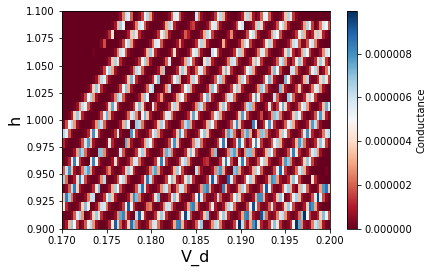

In [55]:
XX,YY = np.meshgrid(V_d_vec,h_vec) 
plt.pcolor(XX,YY,I_vec,cmap='RdBu')
plt.colorbar(label='Conductance')
plt.xlabel('V_d',fontsize=16)
plt.ylabel('h',fontsize=16)

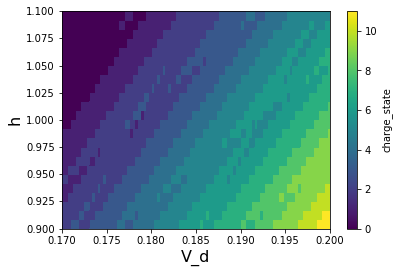

In [54]:
XX,YY = np.meshgrid(V_d_vec,h_vec) 
plt.pcolor(XX,YY,charge_state)
plt.colorbar(label='charge_state')
plt.xlabel('V_d',fontsize=16)
plt.ylabel('h',fontsize=16)